In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requi

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the dataset from Hugging Face
dataset = load_dataset("BothBosu/youtube-scam-conversations")
dataset = dataset.remove_columns("type")

test_dataset = dataset["train"]

test_df = test_dataset.to_pandas()

# Convert the DataFrame to a Hugging Face Dataset
dataset = Dataset.from_pandas(test_df)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/20 [00:00<?, ? examples/s]

In [ ]:
test_df.head()

,dialogue,call,link,channel,labels
0,"Innocent: Yes, hello.\nSuspect: Yes ma'am, are...",outgoing,Scammer BEGS For His Deleted Files As I Drink ...,Scammer Payback,1
1,Suspect: Your Geek Squad subscription is upgra...,outgoing,"Incompetent Scammer Sends Me $25,000 (youtube....",Rinoa Poison,1
2,"Suspect: Cancellation department, how may I he...",outgoing,Scammer Gets Really Angry... Must See [scambai...,scambait tv,1
3,Suspect: Thank you for calling support. How ca...,outgoing,Tech Support Scammer vs Linux Mint (youtube.com),Lewis's Tech,1
4,"Suspect: Thank you for calling PayPal, how may...",outgoing,"Telling a Scammer I'm Keeping His $18,000 (you...",Rinoa Poison,1


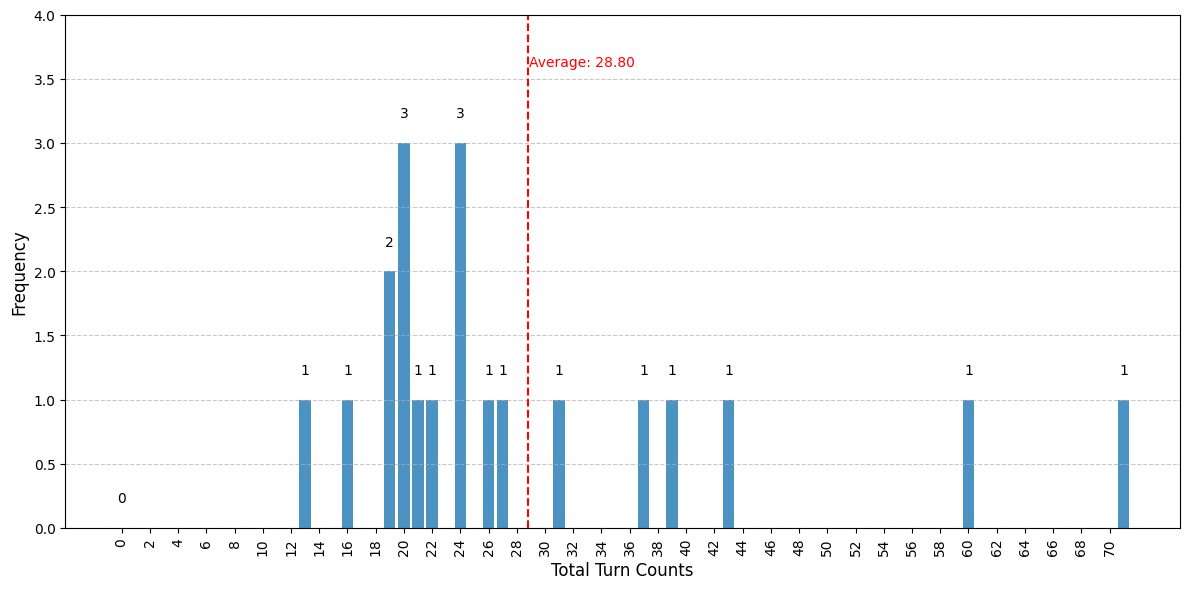

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Count the occurrences of "suspect:" and "innocent:" in each row
test_df['suspect_turns'] = test_df['dialogue'].str.count('Suspect:')
test_df['innocent_turns'] = test_df['dialogue'].str.count('Innocent:')

# Compute the total turns of "suspect:" and "innocent:" in each row
test_df['total_turns'] = test_df['suspect_turns'] + test_df['innocent_turns']

# Create a histogram of the total turns distribution
plt.figure(figsize=(12, 6))

# Calculate the frequency of each total turn count
turn_counts_frequency = test_df['total_turns'].value_counts().sort_index()

# Create a DataFrame with 'Total Turn Counts' and 'Frequency' columns
mode_turns = pd.DataFrame({'Total Turn Counts': turn_counts_frequency.index, 'Frequency': turn_counts_frequency.values})

# Add a bar for 0 count if it doesn't exist in the data
if 0 not in mode_turns['Total Turn Counts'].values:
    mode_turns = pd.concat([pd.DataFrame({'Total Turn Counts': [0], 'Frequency': [0]}), mode_turns], ignore_index=True)

plt.bar(mode_turns['Total Turn Counts'], mode_turns['Frequency'], align='center', alpha=0.8)
plt.xlabel('Total Turn Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# plt.title('Total Turn Counts Distribution of Youtube Scambait Videos', fontsize=14)

# Rotate x-tick labels and limit the number of ticks
plt.xticks(np.arange(0, mode_turns['Total Turn Counts'].max() + 1, step=2), rotation=90)

# Adjust y-axis limit to give more space above the bars
plt.ylim(0, mode_turns['Frequency'].max() + 1)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add labels to the top of each bar
for i, v in enumerate(mode_turns['Frequency']):
    plt.text(mode_turns['Total Turn Counts'][i], v + 0.2, str(v), fontsize=10, ha='center')

# Calculate the average turn count
average_turns = test_df['total_turns'].mean()

# Add average, maximum, and minimum turn information to the plot
plt.axvline(average_turns, color='red', linestyle='--', label=f'Average: {average_turns:.2f}')
plt.text(average_turns + 0.1, plt.ylim()[1] * 0.9, f'Average: {average_turns:.2f}', color='red')

plt.tight_layout()
plt.show()


In [ ]:
test_df.head()

,dialogue,call,link,channel,labels,suspect_turns,innocent_turns,total_turns
0,"Innocent: Yes, hello.\nSuspect: Yes ma'am, are...",outgoing,Scammer BEGS For His Deleted Files As I Drink ...,Scammer Payback,1,34,37,71
1,Suspect: Your Geek Squad subscription is upgra...,outgoing,"Incompetent Scammer Sends Me $25,000 (youtube....",Rinoa Poison,1,10,9,19
2,"Suspect: Cancellation department, how may I he...",outgoing,Scammer Gets Really Angry... Must See [scambai...,scambait tv,1,10,9,19
3,Suspect: Thank you for calling support. How ca...,outgoing,Tech Support Scammer vs Linux Mint (youtube.com),Lewis's Tech,1,19,18,37
4,"Suspect: Thank you for calling PayPal, how may...",outgoing,"Telling a Scammer I'm Keeping His $18,000 (you...",Rinoa Poison,1,10,10,20


In [ ]:
test_df[test_df['total_turns'] == 1]

,dialogue,call,link,channel,labels,suspect_turns,innocent_turns,total_turns


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the dataset from Hugging Face
dataset = load_dataset("BothBosu/youtube-scam-conversations")
dataset = dataset.remove_columns("type")

test_dataset = dataset["train"]

test_df = test_dataset.to_pandas()

# Convert the DataFrame to a Hugging Face Dataset
dataset = Dataset.from_pandas(test_df)

In [ ]:
test_df.head(2)

,dialogue,call,link,channel,labels
0,"Innocent: Yes, hello.\nSuspect: Yes ma'am, are...",outgoing,Scammer BEGS For His Deleted Files As I Drink ...,Scammer Payback,1
1,Suspect: Your Geek Squad subscription is upgra...,outgoing,"Incompetent Scammer Sends Me $25,000 (youtube....",Rinoa Poison,1


In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding

def truncate_dialogue(dialogue, max_turn):
    turns = dialogue.split()
    turn_count = 0
    truncated_dialogue = ""

    for turn in turns:
        if turn.startswith('Suspect:') or turn.startswith('Innocent:'):
            turn_count += 1

            if turn_count > max_turn:
                break

        truncated_dialogue += turn + ' '

    return truncated_dialogue.strip()

# Define the function to count occurrences and total turns
def count_turns(df):
    df['Suspect_turns'] = df['dialogue'].str.count('Suspect:')
    df['Innocent_turns'] = df['dialogue'].str.count('Innocent:')
    df['total_turns'] = df['Suspect_turns'] + df['Innocent_turns']
    return df


# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dialogue column
def tokenize(batch):
    return tokenizer(batch["dialogue"], padding=True, truncation=True)

# Create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer) # The collator rename the column label to labels

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Truncate the dialogues to a specific number of turns and count the turns
def truncate_and_count_turns(test_df, turns):
    truncated_df = test_df.copy()
    truncated_df['dialogue'] = truncated_df['dialogue'].apply(lambda x: truncate_dialogue(x, turns))
    truncated_df = count_turns(truncated_df)
    return truncated_df

# Apply the truncation, filtering, and tokenization for 2 to 29 turns
test_dfs = []
for i in range(2, 30):
    temp_df = truncate_and_count_turns(test_df, i)
    temp_dataset = Dataset.from_pandas(temp_df)
    temp_dataset = temp_dataset.map(tokenize, batched=True)
    test_dfs.append(temp_dataset)


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [ ]:
pd.set_option('display.max_colwidth', None)
test_dfs[0].to_pandas()['dialogue'].head()

,dialogue
0,"Innocent: Yes, hello. Suspect: Yes ma'am, are you there?"
1,"Suspect: Your Geek Squad subscription is upgraded to the premium version. That is why you have been charged for it, ma'am. Innocent: Is there any way to cancel that and get back down to the original?"
2,"Suspect: Cancellation department, how may I help you? Oh yeah, this call is about your computer service that just expired, that's why your account has been charged $400. So do you want to cancel it or do you want to renew it? Innocent: Uh, no, I want to cancel it."
3,"Suspect: Thank you for calling support. How can I help you? Innocent: Hi there, sir. I'm seeing a pop-up message on my screen."
4,"Suspect: Thank you for calling PayPal, how may I help you? Innocent: Um, I'm calling regarding an email you all sent me. It's for $629. I'm not entirely sure what this Bitcoin is."


In [ ]:
len(test_dfs)

28

In [ ]:
from datasets import load_metric
import numpy as np

def evaluate_model(model, dataset, device):
    # Define the metric you want to use for evaluation
    metric = load_metric("accuracy", trust_remote_code=True)

    # Define a function to generate predictions
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Use the map() function to generate predictions
    def generate_predictions(examples):
        input_ids = torch.tensor(examples['input_ids']).to(device)
        attention_mask = torch.tensor(examples['attention_mask']).to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.cpu().numpy()
        return {'predictions': logits}

    dataset = dataset.map(generate_predictions, batched=True, batch_size=32)

    # Compute the accuracy
    accuracy = compute_metrics((dataset['predictions'], dataset['labels']))
    print(f"Accuracy: {accuracy['accuracy']:.4f}")

    return accuracy

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

<ipython-input-13-ddd064c5d1ed>:6: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy", trust_remote_code=True)


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.2000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.2500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.2000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.2500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.3500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.3000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.2500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.4500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.4500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.4500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.5500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.5500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.6000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.7500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


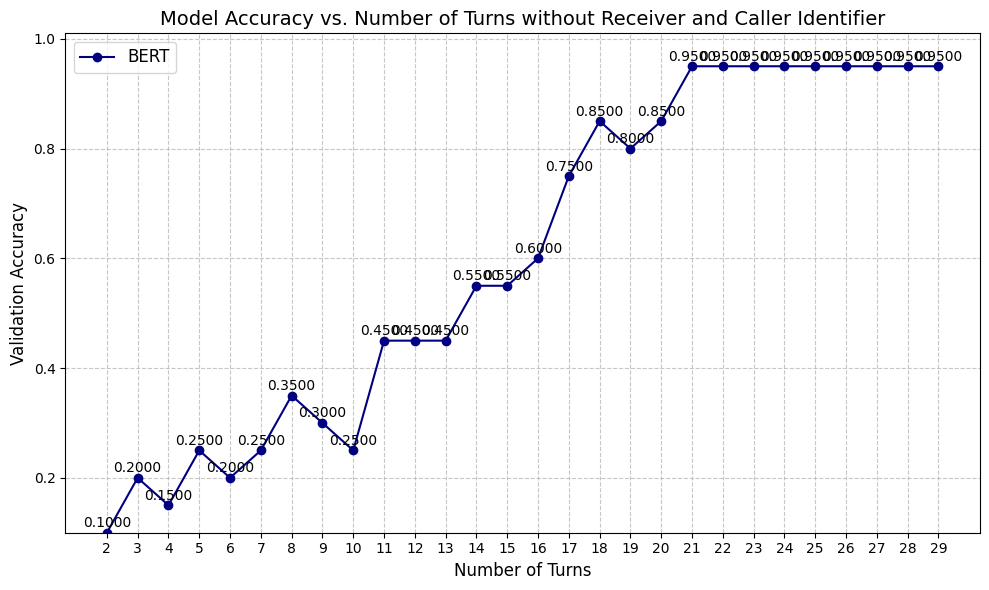

In [ ]:
from transformers import BertForSequenceClassification
import torch

model = BertForSequenceClassification.from_pretrained("BothBosu/bert-scam-classifier-v1.6")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies
BERT_accuracies = []

for df in test_dfs:
    accuracy = evaluate_model(model, df, device)
    BERT_accuracies.append(accuracy['accuracy'])

# Plot the model accuracy graph
turns = range(2, 2 + len(BERT_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BERT_accuracies, marker='o', linestyle='-', color='navy', label='BERT')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BERT_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from torch.utils.data import DataLoader

# Define a function to handle the process for different numbers of turns
def create_data_loader(test_df, num_turns, tokenize, data_collator):
    df_copy = test_df.copy()
    df_copy['dialogue'] = df_copy['dialogue'].apply(lambda x: truncate_dialogue(x, num_turns))
    df_copy = count_turns(df_copy)

    dataset = Dataset.from_pandas(df_copy)
    dataset = dataset.map(tokenize, batched=True)
    dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

    return DataLoader(dataset, batch_size=16, shuffle=False, collate_fn=data_collator)

# Create a list of DataLoaders for 2 to 30 turns
val_loaders = [
    create_data_loader(test_df, num_turns, tokenize, data_collator)
    for num_turns in range(2, 30)
]

def evaluate_model(model, val_loader, device):
    true_labels = []
    predicted_labels = []

    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids)
            _, predicted = torch.max(outputs.data, 1)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(true_labels, predicted_labels)
    return accuracy


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/132M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.9500
Validation Accuracy (3 turns): 1.0000
Validation Accuracy (4 turns): 1.0000
Validation Accuracy (5 turns): 1.0000
Validation Accuracy (6 turns): 1.0000
Validation Accuracy (7 turns): 1.0000
Validation Accuracy (8 turns): 1.0000
Validation Accuracy (9 turns): 1.0000
Validation Accuracy (10 turns): 1.0000
Validation Accuracy (11 turns): 1.0000
Validation Accuracy (12 turns): 1.0000
Validation Accuracy (13 turns): 1.0000
Validation Accuracy (14 turns): 1.0000
Validation Accuracy (15 turns): 1.0000
Validation Accuracy (16 turns): 1.0000
Validation Accuracy (17 turns): 1.0000
Validation Accuracy (18 turns): 1.0000
Validation Accuracy (19 turns): 1.0000
Validation Accuracy (20 turns): 1.0000
Validation Accuracy (21 turns): 1.0000
Validation Accuracy (22 turns): 1.0000
Validation Accuracy (23 turns): 1.0000
Validation Accuracy (24 turns): 1.0000
Validation Accuracy (25 turns): 1.0000
Validation Accuracy (26 turns): 1.0000
Validation Accuracy (27 turns): 1

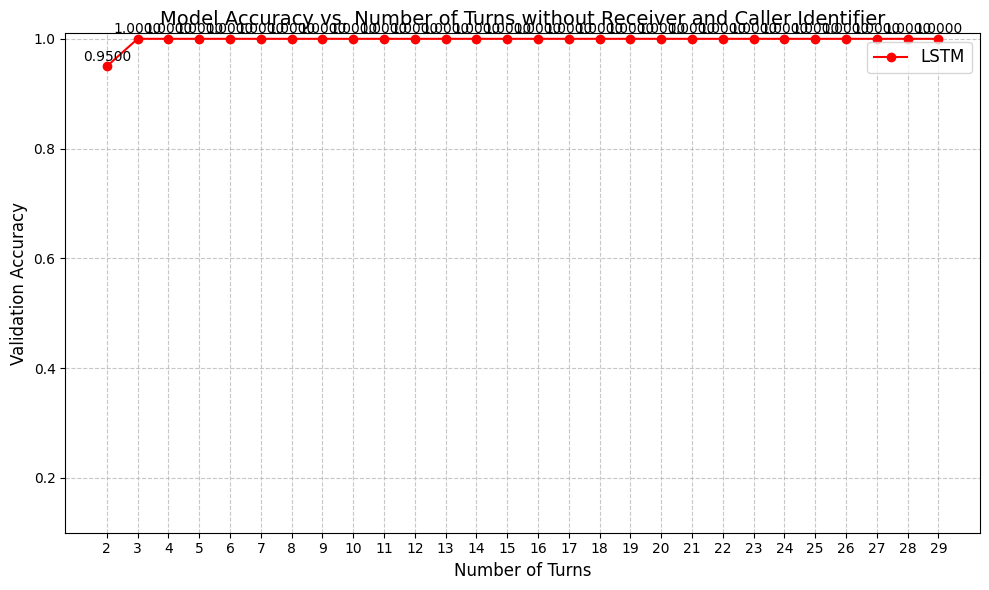

In [ ]:
from huggingface_hub import PyTorchModelHubMixin
import torch
import torch.nn as nn
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the LSTM model class
class LSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout, model_type="lstm"):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = LSTMClassifier.from_pretrained("BothBosu/lstm-scam-classifier-v1.6")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the LSTM model
LSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    LSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(LSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, LSTM_accuracies, marker='o', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(LSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/188M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.6000
Validation Accuracy (3 turns): 0.8000
Validation Accuracy (4 turns): 0.6500
Validation Accuracy (5 turns): 0.7000
Validation Accuracy (6 turns): 0.7500
Validation Accuracy (7 turns): 0.7500
Validation Accuracy (8 turns): 0.8000
Validation Accuracy (9 turns): 0.6500
Validation Accuracy (10 turns): 0.7000
Validation Accuracy (11 turns): 0.5500
Validation Accuracy (12 turns): 0.6000
Validation Accuracy (13 turns): 0.6000
Validation Accuracy (14 turns): 0.7000
Validation Accuracy (15 turns): 0.8000
Validation Accuracy (16 turns): 0.8500
Validation Accuracy (17 turns): 0.9000
Validation Accuracy (18 turns): 0.8500
Validation Accuracy (19 turns): 0.8500
Validation Accuracy (20 turns): 0.8000
Validation Accuracy (21 turns): 0.8500
Validation Accuracy (22 turns): 0.8000
Validation Accuracy (23 turns): 0.9000
Validation Accuracy (24 turns): 0.9000
Validation Accuracy (25 turns): 0.9500
Validation Accuracy (26 turns): 0.9500
Validation Accuracy (27 turns): 0

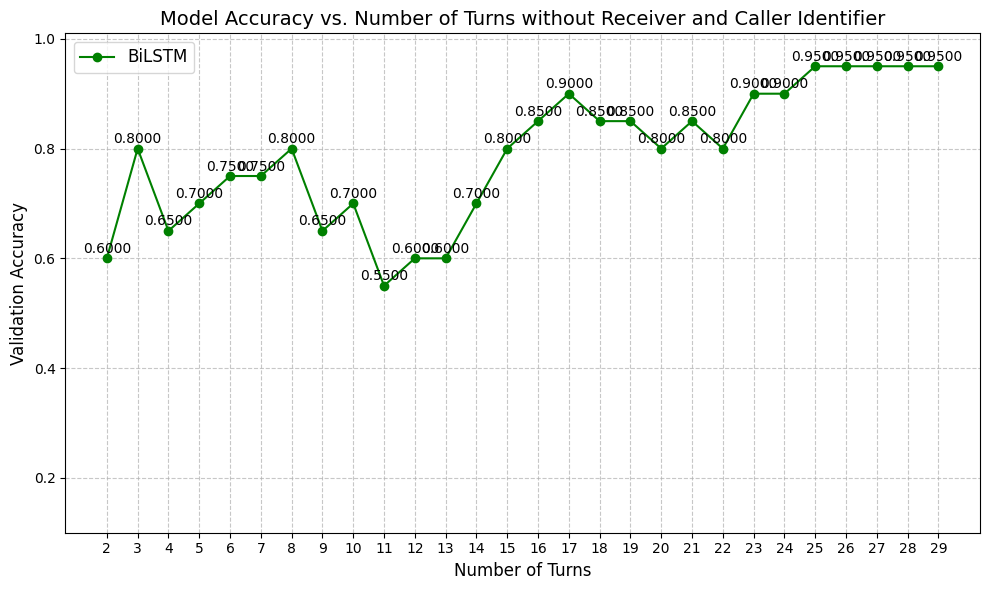

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the LSTM model class
class BiLSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiLSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiLSTM
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiLSTMClassifier.from_pretrained("BothBosu/bilstm-scam-classifier-v1.6")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiLSTM model
BiLSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiLSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(BiLSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiLSTM_accuracies, marker='o', linestyle='-', color='green', label='BiLSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiLSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/122M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.8500
Validation Accuracy (3 turns): 0.9000
Validation Accuracy (4 turns): 0.8500
Validation Accuracy (5 turns): 0.7000
Validation Accuracy (6 turns): 0.8500
Validation Accuracy (7 turns): 0.8000
Validation Accuracy (8 turns): 0.7500
Validation Accuracy (9 turns): 0.7500
Validation Accuracy (10 turns): 0.6500
Validation Accuracy (11 turns): 0.6000
Validation Accuracy (12 turns): 0.6500
Validation Accuracy (13 turns): 0.6500
Validation Accuracy (14 turns): 0.6500
Validation Accuracy (15 turns): 0.6500
Validation Accuracy (16 turns): 0.6500
Validation Accuracy (17 turns): 0.7500
Validation Accuracy (18 turns): 0.6500
Validation Accuracy (19 turns): 0.7000
Validation Accuracy (20 turns): 0.7500
Validation Accuracy (21 turns): 0.6500
Validation Accuracy (22 turns): 0.7500
Validation Accuracy (23 turns): 0.7500
Validation Accuracy (24 turns): 0.7500
Validation Accuracy (25 turns): 0.8000
Validation Accuracy (26 turns): 0.8000
Validation Accuracy (27 turns): 0

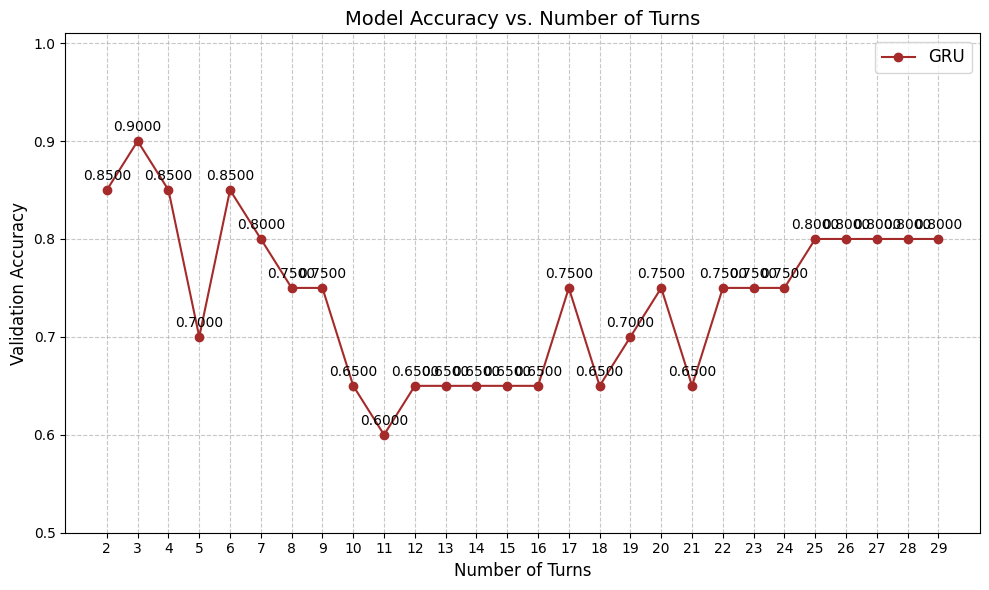

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the GRU model class
class GRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = GRUClassifier.from_pretrained("BothBosu/gru-scam-classifier-v1.6")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the GRU model
GRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    GRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(GRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, GRU_accuracies, marker='o', linestyle='-', color='brown', label='GRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(GRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/165M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.6000
Validation Accuracy (3 turns): 0.6000
Validation Accuracy (4 turns): 0.5500
Validation Accuracy (5 turns): 0.6500
Validation Accuracy (6 turns): 0.6500
Validation Accuracy (7 turns): 0.6500
Validation Accuracy (8 turns): 0.6500
Validation Accuracy (9 turns): 0.6500
Validation Accuracy (10 turns): 0.6500
Validation Accuracy (11 turns): 0.6500
Validation Accuracy (12 turns): 0.6500
Validation Accuracy (13 turns): 0.6000
Validation Accuracy (14 turns): 0.7500
Validation Accuracy (15 turns): 0.7000
Validation Accuracy (16 turns): 0.6500
Validation Accuracy (17 turns): 0.7500
Validation Accuracy (18 turns): 0.7000
Validation Accuracy (19 turns): 0.6500
Validation Accuracy (20 turns): 0.7500
Validation Accuracy (21 turns): 0.7500
Validation Accuracy (22 turns): 0.8000
Validation Accuracy (23 turns): 0.8000
Validation Accuracy (24 turns): 0.8000
Validation Accuracy (25 turns): 0.8500
Validation Accuracy (26 turns): 0.9500
Validation Accuracy (27 turns): 0

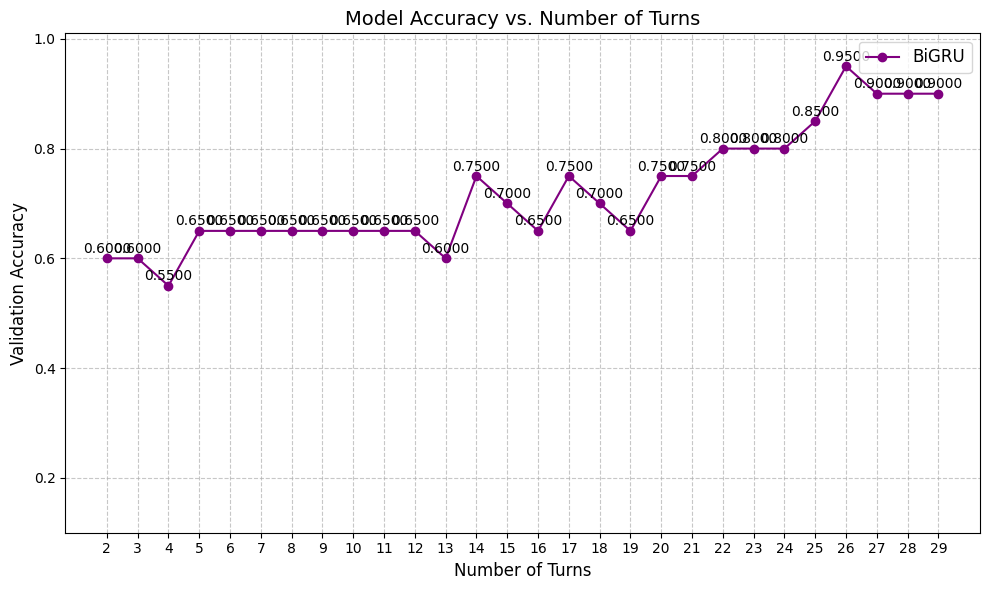

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the BiGRU model class
class BiGRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiGRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiGRU
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiGRUClassifier.from_pretrained("BothBosu/bigru-scam-classifier-v1.6")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiGRU model
BiGRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiGRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(BiGRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiGRU_accuracies, marker='o', linestyle='-', color='purple', label='BiGRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiGRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.1000
Validation Accuracy (3 turns): 0.2000
Validation Accuracy (4 turns): 0.2500
Validation Accuracy (5 turns): 0.3000
Validation Accuracy (6 turns): 0.4000
Validation Accuracy (7 turns): 0.4000
Validation Accuracy (8 turns): 0.3000
Validation Accuracy (9 turns): 0.4500
Validation Accuracy (10 turns): 0.5000
Validation Accuracy (11 turns): 0.5500
Validation Accuracy (12 turns): 0.6500
Validation Accuracy (13 turns): 0.7000
Validation Accuracy (14 turns): 0.7000
Validation Accuracy (15 turns): 0.7000
Validation Accuracy (16 turns): 0.7000
Validation Accuracy (17 turns): 0.7000
Validation Accuracy (18 turns): 0.7000
Validation Accuracy (19 turns): 0.7000
Validation Accuracy (20 turns): 0.7000
Validation Accuracy (21 turns): 0.7000
Validation Accuracy (22 turns): 0.7000
Validation Accuracy (23 turns): 0.7000
Validation Accuracy (24 turns): 0.7000
Validation Accuracy (25 turns): 0.7000
Validation Accuracy (26 turns): 0.7000
Validation Accuracy (27 turns): 0

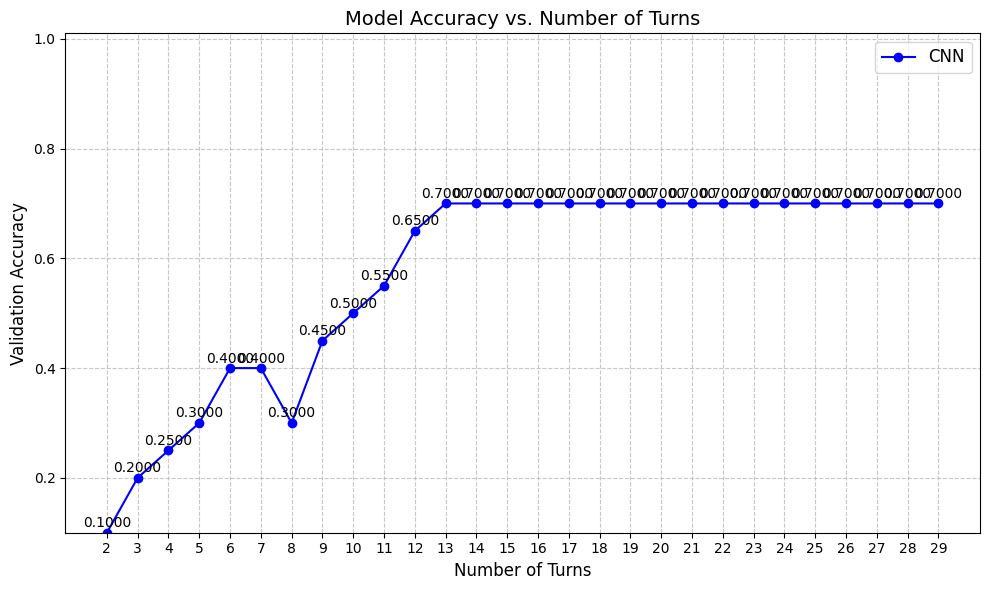

In [ ]:
from huggingface_hub import PyTorchModelHubMixin
import torch.nn.functional as F

# Define the CNN model class
class CNNClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=fs) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        output = self.fc(cat)
        return output


model = CNNClassifier.from_pretrained("BothBosu/cnn-scam-classifier-v1.6")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create a list to store the accuracies
CNN_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    CNN_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(CNN_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

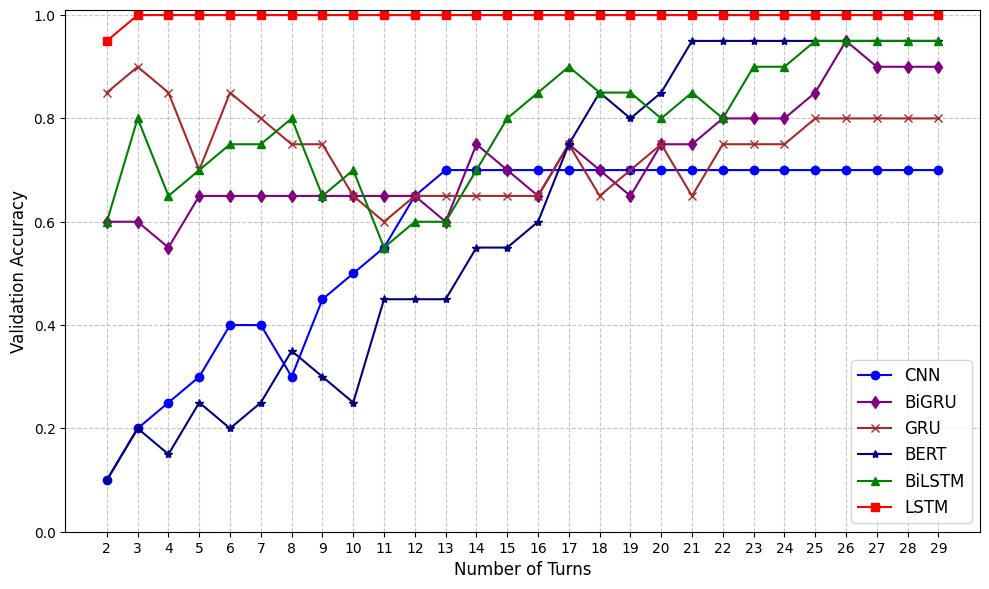

In [ ]:
import matplotlib.pyplot as plt

# Plot the model accuracy graph
turns = range(2, 2 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))

plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')
plt.plot(turns, BiGRU_accuracies, marker='d', linestyle='-', color='purple', label='BiGRU')
plt.plot(turns, GRU_accuracies, marker='x', linestyle='-', color='brown', label='GRU')
plt.plot(turns, BERT_accuracies, marker='*', linestyle='-', color='navy', label='BERT')
plt.plot(turns, BiLSTM_accuracies, marker='^', linestyle='-', color='green', label='BiLSTM')
plt.plot(turns, LSTM_accuracies, marker='s', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
# plt.title('Model Accuracy vs. Number of Turns on Youtube Videoes (Trained on Single-Agent Dataset)', fontsize=14)

plt.xticks(turns)
plt.ylim(0, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the dataset from Hugging Face
dataset = load_dataset("BothBosu/youtube-scam-conversations")
dataset = dataset.remove_columns("type")

test_dataset = dataset["train"]

test_df = test_dataset.to_pandas()

# Convert the DataFrame to a Hugging Face Dataset
dataset = Dataset.from_pandas(test_df)

# Truncate the dialogues to a specific number of turns and count the turns
def truncate_and_count_turns(test_df, turns):
    truncated_df = test_df.copy()
    truncated_df['dialogue'] = truncated_df['dialogue'].apply(lambda x: truncate_dialogue(x, turns))
    truncated_df = count_turns(truncated_df)
    return truncated_df

# Apply the truncation, filtering, and tokenization for 2 to 29 turns
test_dfs = []
for i in range(2, 30):
    temp_df = truncate_and_count_turns(test_df, i)
    temp_dataset = Dataset.from_pandas(temp_df)
    temp_dataset = temp_dataset.map(tokenize, batched=True)
    test_dfs.append(temp_dataset)


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_metric
import numpy as np

def evaluate_model(model, dataset, device):
    # Define the metric you want to use for evaluation
    metric = load_metric("accuracy", trust_remote_code=True)

    # Define a function to generate predictions
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Use the map() function to generate predictions
    def generate_predictions(examples):
        input_ids = torch.tensor(examples['input_ids']).to(device)
        attention_mask = torch.tensor(examples['attention_mask']).to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.cpu().numpy()
        return {'predictions': logits}

    dataset = dataset.map(generate_predictions, batched=True, batch_size=32)

    # Compute the accuracy
    accuracy = compute_metrics((dataset['predictions'], dataset['labels']))
    print(f"Accuracy: {accuracy['accuracy']:.4f}")

    return accuracy

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.2000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.0500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.0500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.0500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.0500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


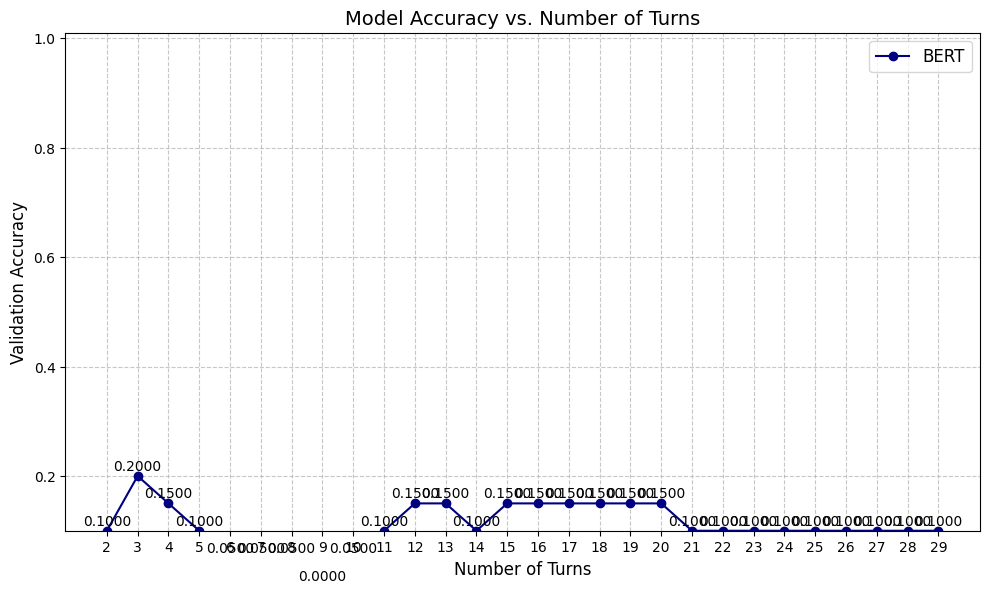

In [ ]:
from transformers import BertForSequenceClassification
import torch

model = BertForSequenceClassification.from_pretrained("BothBosu/bert-agent-scam-classifier-v1.0")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies
BERT_accuracies = []

for df in test_dfs:
    accuracy = evaluate_model(model, df, device)
    BERT_accuracies.append(accuracy['accuracy'])

# Plot the model accuracy graph
turns = range(2, 2 + len(BERT_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BERT_accuracies, marker='o', linestyle='-', color='navy', label='BERT')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BERT_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from torch.utils.data import DataLoader

# Define a function to handle the process for different numbers of turns
def create_data_loader(test_df, num_turns, tokenize, data_collator):
    df_copy = test_df.copy()
    df_copy['dialogue'] = df_copy['dialogue'].apply(lambda x: truncate_dialogue(x, num_turns))
    df_copy = count_turns(df_copy)

    dataset = Dataset.from_pandas(df_copy)
    dataset = dataset.map(tokenize, batched=True)
    dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

    return DataLoader(dataset, batch_size=16, shuffle=False, collate_fn=data_collator)

# Create a list of DataLoaders for 2 to 29 turns
val_loaders = [
    create_data_loader(test_df, num_turns, tokenize, data_collator)
    for num_turns in range(2, 30)
]

def evaluate_model(model, val_loader, device):
    true_labels = []
    predicted_labels = []

    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids)
            _, predicted = torch.max(outputs.data, 1)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(true_labels, predicted_labels)
    return accuracy


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/132M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.6000
Validation Accuracy (3 turns): 0.6500
Validation Accuracy (4 turns): 0.5500
Validation Accuracy (5 turns): 0.5500
Validation Accuracy (6 turns): 0.6000
Validation Accuracy (7 turns): 0.6500
Validation Accuracy (8 turns): 0.6500
Validation Accuracy (9 turns): 0.6000
Validation Accuracy (10 turns): 0.7000
Validation Accuracy (11 turns): 0.6500
Validation Accuracy (12 turns): 0.6500
Validation Accuracy (13 turns): 0.6500
Validation Accuracy (14 turns): 0.7000
Validation Accuracy (15 turns): 0.7000
Validation Accuracy (16 turns): 0.6000
Validation Accuracy (17 turns): 0.6500
Validation Accuracy (18 turns): 0.7000
Validation Accuracy (19 turns): 0.7000
Validation Accuracy (20 turns): 0.7000
Validation Accuracy (21 turns): 0.7500
Validation Accuracy (22 turns): 0.8000
Validation Accuracy (23 turns): 0.8000
Validation Accuracy (24 turns): 0.8000
Validation Accuracy (25 turns): 0.8000
Validation Accuracy (26 turns): 0.8000
Validation Accuracy (27 turns): 0

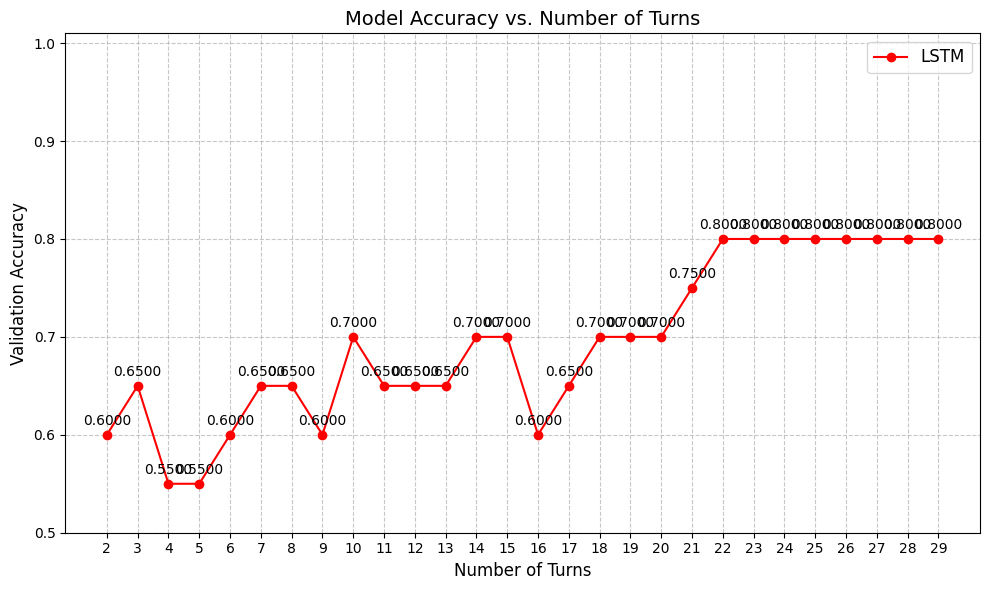

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the LSTM model class
class LSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout, model_type="lstm"):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = LSTMClassifier.from_pretrained("BothBosu/lstm-agent-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the LSTM model
LSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    LSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(LSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, LSTM_accuracies, marker='o', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(LSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/188M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.1000
Validation Accuracy (3 turns): 0.1500
Validation Accuracy (4 turns): 0.2000
Validation Accuracy (5 turns): 0.2000
Validation Accuracy (6 turns): 0.2500
Validation Accuracy (7 turns): 0.1500
Validation Accuracy (8 turns): 0.0500
Validation Accuracy (9 turns): 0.1000
Validation Accuracy (10 turns): 0.1000
Validation Accuracy (11 turns): 0.1000
Validation Accuracy (12 turns): 0.1500
Validation Accuracy (13 turns): 0.1500
Validation Accuracy (14 turns): 0.1500
Validation Accuracy (15 turns): 0.1500
Validation Accuracy (16 turns): 0.1500
Validation Accuracy (17 turns): 0.1500
Validation Accuracy (18 turns): 0.1500
Validation Accuracy (19 turns): 0.1500
Validation Accuracy (20 turns): 0.1500
Validation Accuracy (21 turns): 0.1500
Validation Accuracy (22 turns): 0.1500
Validation Accuracy (23 turns): 0.1000
Validation Accuracy (24 turns): 0.1000
Validation Accuracy (25 turns): 0.1000
Validation Accuracy (26 turns): 0.1000
Validation Accuracy (27 turns): 0

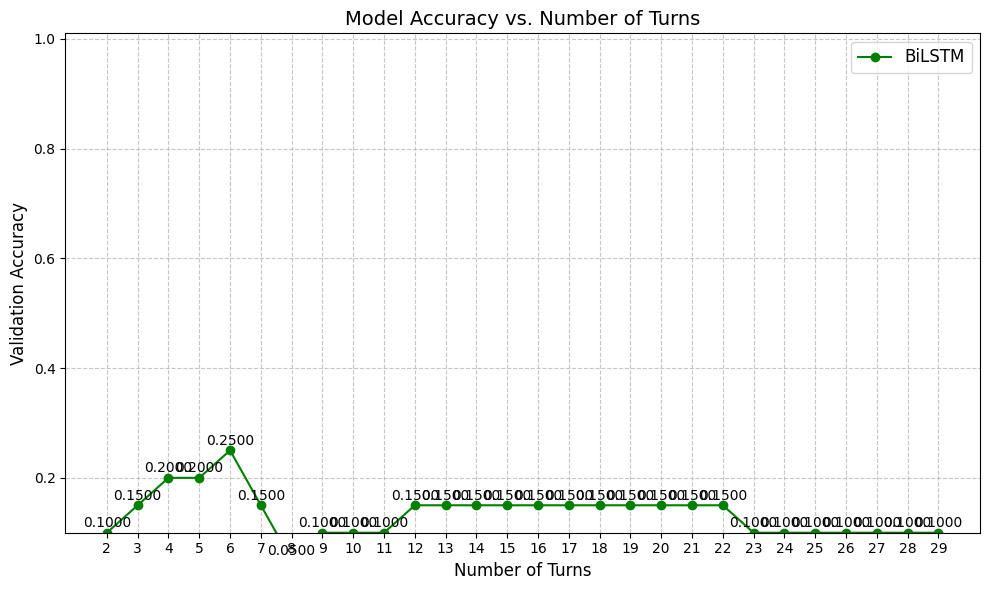

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the LSTM model class
class BiLSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiLSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiLSTM
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiLSTMClassifier.from_pretrained("BothBosu/bilstm-agent-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiLSTM model
BiLSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiLSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(BiLSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiLSTM_accuracies, marker='o', linestyle='-', color='green', label='BiLSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiLSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/122M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.7000
Validation Accuracy (3 turns): 0.6000
Validation Accuracy (4 turns): 0.5000
Validation Accuracy (5 turns): 0.6000
Validation Accuracy (6 turns): 0.6000
Validation Accuracy (7 turns): 0.5500
Validation Accuracy (8 turns): 0.6000
Validation Accuracy (9 turns): 0.6000
Validation Accuracy (10 turns): 0.6000
Validation Accuracy (11 turns): 0.5500
Validation Accuracy (12 turns): 0.6500
Validation Accuracy (13 turns): 0.6000
Validation Accuracy (14 turns): 0.6000
Validation Accuracy (15 turns): 0.6000
Validation Accuracy (16 turns): 0.6500
Validation Accuracy (17 turns): 0.6500
Validation Accuracy (18 turns): 0.6500
Validation Accuracy (19 turns): 0.7000
Validation Accuracy (20 turns): 0.7000
Validation Accuracy (21 turns): 0.7500
Validation Accuracy (22 turns): 0.7500
Validation Accuracy (23 turns): 0.7500
Validation Accuracy (24 turns): 0.7000
Validation Accuracy (25 turns): 0.7000
Validation Accuracy (26 turns): 0.7000
Validation Accuracy (27 turns): 0

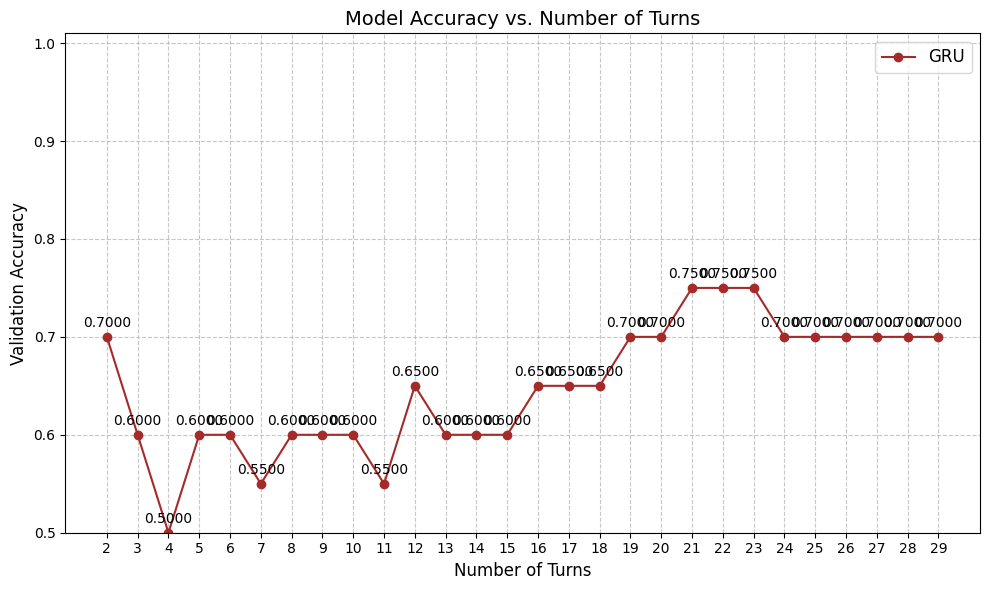

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the GRU model class
class GRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = GRUClassifier.from_pretrained("BothBosu/gru-agent-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the GRU model
GRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    GRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(GRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, GRU_accuracies, marker='o', linestyle='-', color='brown', label='GRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(GRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/165M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.5000
Validation Accuracy (3 turns): 0.5500
Validation Accuracy (4 turns): 0.6000
Validation Accuracy (5 turns): 0.7500
Validation Accuracy (6 turns): 0.8000
Validation Accuracy (7 turns): 0.8000
Validation Accuracy (8 turns): 0.8000
Validation Accuracy (9 turns): 0.8500
Validation Accuracy (10 turns): 0.8500
Validation Accuracy (11 turns): 0.9000
Validation Accuracy (12 turns): 0.9500
Validation Accuracy (13 turns): 0.9500
Validation Accuracy (14 turns): 0.9500
Validation Accuracy (15 turns): 0.9500
Validation Accuracy (16 turns): 0.9500
Validation Accuracy (17 turns): 0.9500
Validation Accuracy (18 turns): 1.0000
Validation Accuracy (19 turns): 1.0000
Validation Accuracy (20 turns): 1.0000
Validation Accuracy (21 turns): 1.0000
Validation Accuracy (22 turns): 1.0000
Validation Accuracy (23 turns): 1.0000
Validation Accuracy (24 turns): 1.0000
Validation Accuracy (25 turns): 1.0000
Validation Accuracy (26 turns): 1.0000
Validation Accuracy (27 turns): 1

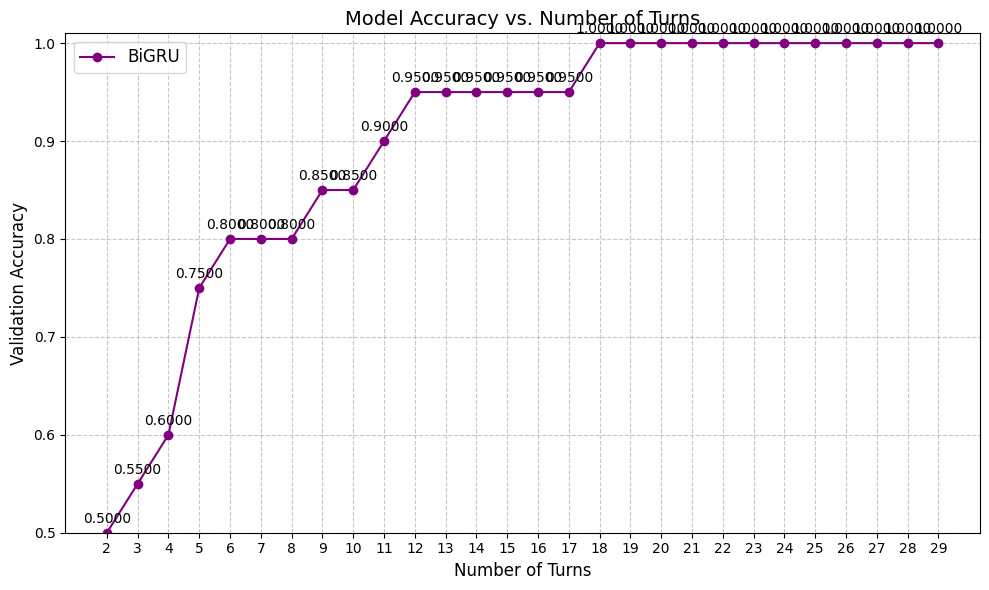

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

# Define the BiGRU model class
class BiGRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiGRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiGRU
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiGRUClassifier.from_pretrained("BothBosu/bigru-agent-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiGRU model
BiGRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiGRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(BiGRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiGRU_accuracies, marker='o', linestyle='-', color='purple', label='BiGRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiGRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.1500
Validation Accuracy (3 turns): 0.1500
Validation Accuracy (4 turns): 0.2000
Validation Accuracy (5 turns): 0.1500
Validation Accuracy (6 turns): 0.2000
Validation Accuracy (7 turns): 0.3000
Validation Accuracy (8 turns): 0.3000
Validation Accuracy (9 turns): 0.3500
Validation Accuracy (10 turns): 0.4000
Validation Accuracy (11 turns): 0.3500
Validation Accuracy (12 turns): 0.3500
Validation Accuracy (13 turns): 0.3500
Validation Accuracy (14 turns): 0.3500
Validation Accuracy (15 turns): 0.3500
Validation Accuracy (16 turns): 0.3500
Validation Accuracy (17 turns): 0.3500
Validation Accuracy (18 turns): 0.4000
Validation Accuracy (19 turns): 0.4000
Validation Accuracy (20 turns): 0.4000
Validation Accuracy (21 turns): 0.4000
Validation Accuracy (22 turns): 0.4000
Validation Accuracy (23 turns): 0.4000
Validation Accuracy (24 turns): 0.4000
Validation Accuracy (25 turns): 0.4000
Validation Accuracy (26 turns): 0.4500
Validation Accuracy (27 turns): 0

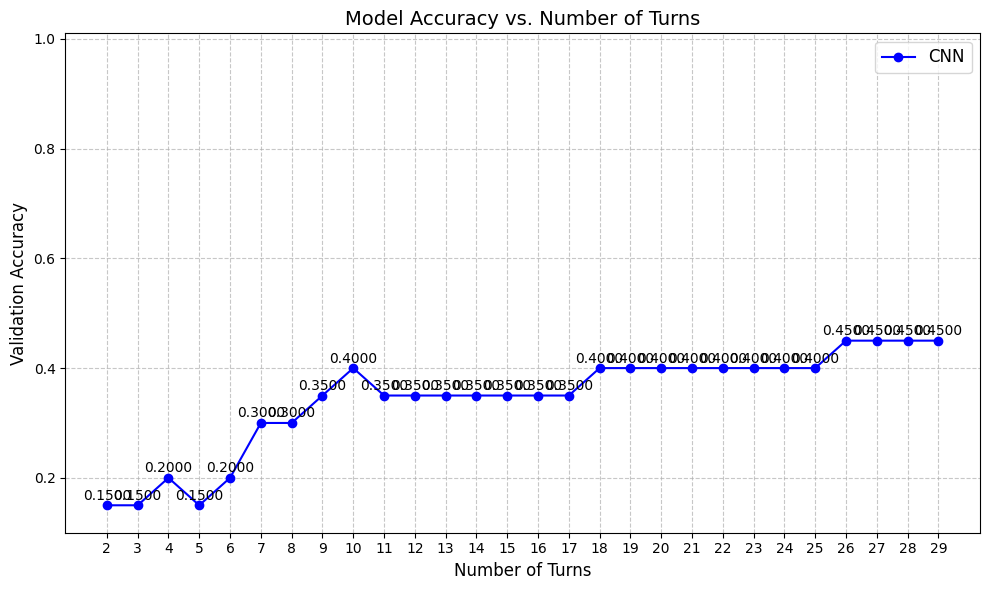

In [ ]:
from huggingface_hub import PyTorchModelHubMixin
import torch.nn.functional as F

# Define the CNN model class
class CNNClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=fs) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        output = self.fc(cat)
        return output


model = CNNClassifier.from_pretrained("BothBosu/cnn-agent-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create a list to store the accuracies
CNN_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    CNN_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(2, 2 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(CNN_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

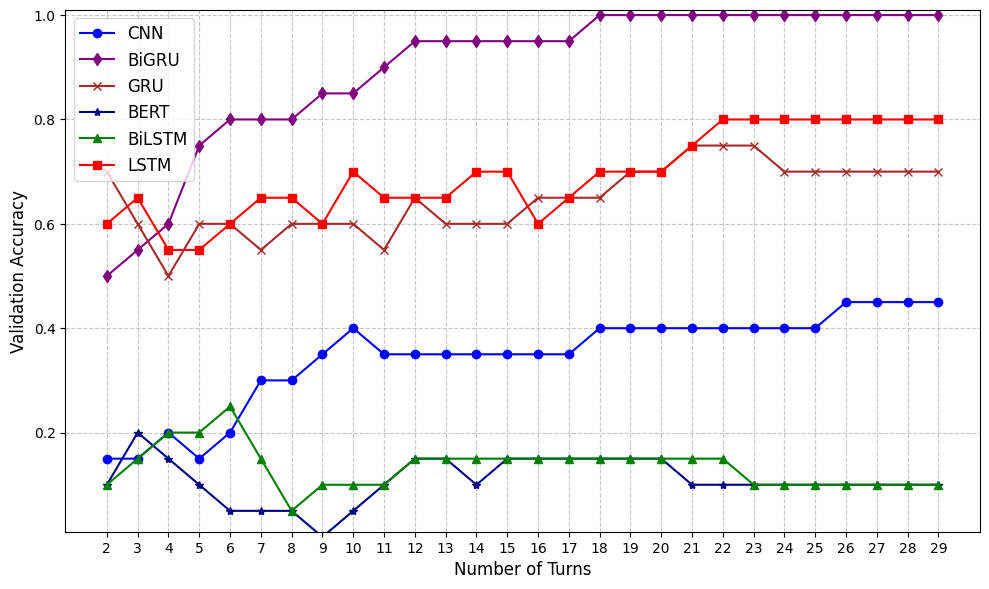

In [ ]:
import matplotlib.pyplot as plt

# Plot the model accuracy graph
turns = range(2, 2 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))

plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')
plt.plot(turns, BiGRU_accuracies, marker='d', linestyle='-', color='purple', label='BiGRU')
plt.plot(turns, GRU_accuracies, marker='x', linestyle='-', color='brown', label='GRU')
plt.plot(turns, BERT_accuracies, marker='*', linestyle='-', color='navy', label='BERT')
plt.plot(turns, BiLSTM_accuracies, marker='^', linestyle='-', color='green', label='BiLSTM')
plt.plot(turns, LSTM_accuracies, marker='s', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
# plt.title('Model Accuracy vs. Number of Turns on Youtube Videos (Trained on Multi-Agent Dataset)', fontsize=14)

plt.xticks(turns)
plt.ylim(0.01, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()